# Building Models with PyTorch
https://docs.pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html 

## torch.nn.Module and torch.nn.Parameter

Except for Parameter, the classes we discuss in this video are all subclasses of torch.nn.Module. This is the PyTorch base class meant to encapsulate behaviors specific to PyTorch Models and their components.

One important behavior of torch.nn.Module is registering parameters. If a particular Module subclass has learning weights, these weights are expressed as instances of torch.nn.Parameter. The Parameter class is a subclass of torch.Tensor, with the special behavior that when they are assigned as attributes of a Module, they are added to the list of that modules parameters. These parameters may be accessed through the parameters() method on the Module class.

As a simple example, here’s a very simple model with two linear layers and an activation function. We’ll create an instance of it and ask it to report on its parameters:

In [ ]:
import torch

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for param in tinymodel.parameters():
    print(param)

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

This shows the fundamental structure of a PyTorch model: there is an __init__() method that defines the layers and other components of a model, and a forward() method where the computation gets done. Note that we can print the model, or any of its submodules, to learn about its structure.

# Common Layer Types

## Linear Layers
The most basic type of neural network layer is a linear or fully connected layer. This is a layer where every input influences every output of the layer to a degree specified by the layer’s weights. If a model has m inputs and n outputs, the weights will be an m x n matrix. For example:

In [2]:
lin = torch.nn.Linear(3, 2)      # Input: 3 and output: 2, with Randomly initialized weights and biases
x = torch.rand(1, 3)
print('Input:')
print(x)

print('\n\nWeight and Bias parameters:')
for param in lin.parameters():
    print(param)

y = lin(x)       # y[0] = x[0]*w[0,0] + x[1]*w[0,1] + x[2]*w[0,2] + bias[0]  
                 # y[1] = x[0]*w[1,0] + x[1]*w[1,1] + x[2]*w[1,2] + bias[1]

print('\n\nOutput:')
print(y)

Input:
tensor([[0.5718, 0.4688, 0.9438]])


Weight and Bias parameters:
Parameter containing:
tensor([[-0.5743, -0.3948,  0.4913],
        [ 0.2422,  0.0302,  0.4751]], requires_grad=True)
Parameter containing:
tensor([ 0.2812, -0.1635], requires_grad=True)


Output:
tensor([[0.2314, 0.4376]], grad_fn=<AddmmBackward0>)


One other important feature to note: When we checked the weights of our layer with lin.weight, it reported itself as a Parameter (which is a subclass of Tensor), and let us know that it’s tracking gradients with autograd. This is a default behavior for Parameter that differs from Tensor.

Linear layers are used widely in deep learning models. One of the most common places you’ll see them is in classifier models, which will usually have one or more linear layers at the end, where the last layer will have n outputs, where n is the number of classes the classifier addresses.

# Convolutional Layers
Convolutional layers are built to handle data with a high degree of spatial correlation. They are very commonly used in computer vision, where they detect close groupings of features which the compose into higher-level features. They pop up in other contexts too - for example, in NLP applications, where a word’s immediate context (that is, the other words nearby in the sequence) can affect the meaning of a sentence.

From ChatGPT5 - A convolutional layer applies a set of learnable filters (kernels) across an input (like an image, audio, or text embedding).
Each filter slides (“convolves”) over the input, performing an element-wise multiplication and sum.

From DeepSeek - At its heart, a convolutional layer applies a filter (or kernel) that slides across the input data, computing dot products at each position:

text
Input: [1, 2, 3, 2, 1]
Filter: [1, 0, -1]

Convolution:
[1,2,3] • [1,0,-1] = (1×1)+(2×0)+(3×-1) = -2
[2,3,2] • [1,0,-1] = (2×1)+(3×0)+(2×-1) = 0  
[3,2,1] • [1,0,-1] = (3×1)+(2×0)+(1×-1) = 2

In [3]:
import torch.functional as F


class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

# Recurrent Layers
Recurrent neural networks (or RNNs) are used for sequential data - anything from time-series measurements from a scientific instrument to natural language sentences to DNA nucleotides. An RNN does this by maintaining a hidden state that acts as a sort of memory for what it has seen in the sequence so far.

The internal structure of an RNN layer - or its variants, the LSTM (long short-term memory) and GRU (gated recurrent unit) - is moderately complex and beyond the scope of this video, but we’ll show you what one looks like in action with an LSTM-based part-of-speech tagger (a type of classifier that tells you if a word is a noun, verb, etc.):

From ChatGPT5 - A Recurrent Neural Network (RNN) processes sequences by keeping track of information over time.
Instead of treating each input independently (like a feedforward net does), an RNN passes information forward through time via its hidden state.

In [5]:
class LSTMTagger(torch.nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        self.hidden_dim = hidden_dim

        self.word_embeddings = torch.nn.Embedding(vocab_size, embedding_dim)

        # The LSTM takes word embeddings as inputs, and outputs hidden states
        # with dimensionality hidden_dim.
        self.lstm = torch.nn.LSTM(embedding_dim, hidden_dim)

        # The linear layer that maps from hidden state space to tag space
        self.hidden2tag = torch.nn.Linear(hidden_dim, tagset_size)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        lstm_out, _ = self.lstm(embeds.view(len(sentence), 1, -1))
        tag_space = self.hidden2tag(lstm_out.view(len(sentence), -1))
        tag_scores = F.log_softmax(tag_space, dim=1)
        return tag_scores

# Transformers
Transformers are multi-purpose networks that have taken over the state of the art in NLP with models like BERT. A discussion of transformer architecture is beyond the scope of this video, but PyTorch has a Transformer class that allows you to define the overall parameters of a transformer model - the number of attention heads, the number of encoder & decoder layers, dropout and activation functions, etc. (You can even build the BERT model from this single class, with the right parameters!) The torch.nn.Transformer class also has classes to encapsulate the individual components (TransformerEncoder, TransformerDecoder) and subcomponents (TransformerEncoderLayer, TransformerDecoderLayer). For details, check out the documentation on transformer classes.

# Other Layers and Functions
Data Manipulation Layers
There are other layer types that perform important functions in models, but don’t participate in the learning process themselves.

Max pooling (and its twin, min pooling) reduce a tensor by combining cells, and assigning the maximum value of the input cells to the output cell (we saw this). For example:

In [6]:
my_tensor = torch.rand(1, 6, 6)
print(my_tensor)

maxpool_layer = torch.nn.MaxPool2d(3)
print(maxpool_layer(my_tensor))

tensor([[[0.1626, 0.9316, 0.4732, 0.7175, 0.2468, 0.6770],
         [0.7187, 0.9831, 0.0242, 0.0239, 0.6413, 0.9894],
         [0.1443, 0.1752, 0.8575, 0.7657, 0.7742, 0.5140],
         [0.8411, 0.0319, 0.7974, 0.2906, 0.9460, 0.3663],
         [0.5865, 0.7794, 0.0700, 0.8780, 0.4769, 0.9791],
         [0.1886, 0.2648, 0.1911, 0.7919, 0.2168, 0.0623]]])
tensor([[[0.9831, 0.9894],
         [0.8411, 0.9791]]])


Max Pooled Output:
 tensor([[[[0.9053, 0.9435],
          [0.9609, 0.9628]]]])


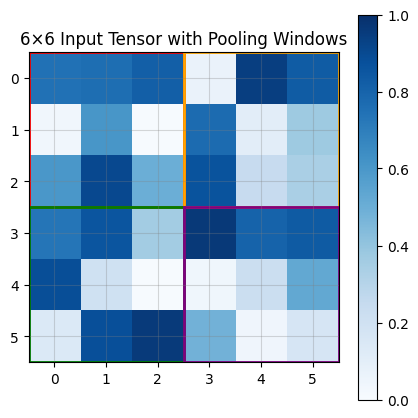

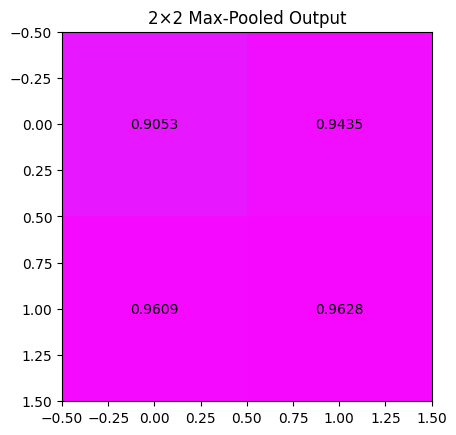

In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Your 6×6 example tensor
x = torch.tensor([[[[0.7461, 0.7601, 0.8166, 0.0662, 0.9435, 0.8295],
                    [0.0349, 0.6024, 0.0044, 0.7703, 0.1016, 0.3744],
                    [0.6003, 0.9053, 0.4983, 0.8662, 0.2452, 0.3394],
                    [0.7325, 0.8567, 0.3576, 0.9628, 0.8032, 0.8328],
                    [0.8857, 0.2014, 0.0047, 0.0373, 0.2216, 0.5273],
                    [0.1371, 0.8790, 0.9609, 0.4840, 0.0418, 0.1669]]]])

# Define a 3×3 MaxPool layer
pool = torch.nn.MaxPool2d(kernel_size=3)

# Apply pooling
y = pool(x)

print("Max Pooled Output:\n", y)

# Convert to NumPy for visualization
x_np = x[0,0].numpy()

# Function to highlight each pooling region
def highlight_region(ax, matrix, start_row, start_col, size, color):
    rect = plt.Rectangle((start_col-0.5, start_row-0.5), size, size,
                         linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)

# Show the tensor and highlight pooling windows
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(x_np, cmap='Blues', vmin=0, vmax=1)
ax.set_title("6×6 Input Tensor with Pooling Windows")
ax.set_xticks(range(6))
ax.set_yticks(range(6))
ax.grid(True, color='gray', alpha=0.3)

# Highlight 3×3 pooling windows
highlight_region(ax, x_np, 0, 0, 3, 'red')
highlight_region(ax, x_np, 0, 3, 3, 'orange')
highlight_region(ax, x_np, 3, 0, 3, 'green')
highlight_region(ax, x_np, 3, 3, 3, 'purple')

plt.colorbar(im, ax=ax)
plt.show()

# Display output visually
fig, ax = plt.subplots()
ax.imshow(y[0,0].detach(), cmap='cool', vmin=0, vmax=1)
ax.set_title("2×2 Max-Pooled Output")
for i in range(2):
    for j in range(2):
        ax.text(j, i, f"{y[0,0,i,j]:.4f}", ha='center', va='center', color='black')
plt.show()


# Normalization layers 
Normalizatin layers re-center and normalize the output of one layer before feeding it to another. Centering and scaling the intermediate tensors has a number of beneficial effects, such as letting you use higher learning rates without exploding/vanishing gradients.

In [8]:
my_tensor = torch.rand(1, 4, 4) * 20 + 5
print(my_tensor)

print(my_tensor.mean())

norm_layer = torch.nn.BatchNorm1d(4)
normed_tensor = norm_layer(my_tensor)
print(normed_tensor)

print(normed_tensor.mean())

tensor([[[13.4002, 23.1242,  9.3319, 18.7443],
         [ 7.8908, 14.7741,  7.2666, 13.5140],
         [15.3603, 14.5659,  6.4094, 24.6497],
         [ 5.6877, 14.2288, 12.4085, 22.0486]]])
tensor(13.9628)
tensor([[[-0.5258,  1.3334, -1.3036,  0.4960],
         [-0.8947,  1.1785, -1.0827,  0.7990],
         [ 0.0176, -0.1053, -1.3677,  1.4554],
         [-1.3568,  0.1090, -0.2034,  1.4511]]],
       grad_fn=<NativeBatchNormBackward0>)
tensor(-2.9802e-08, grad_fn=<MeanBackward0>)


# Dropout layers 
Dropout layers are a tool for encouraging sparse representations in your model - that is, pushing it to do inference with less data.

Dropout layers work by randomly setting parts of the input tensor during training - dropout layers are always turned off for inference. This forces the model to learn against this masked or reduced dataset. For example:

from ChatGPT: A Dropout layer randomly "turns off" a fraction of neurons during training (by setting them to zero).
This forces the network to not rely too heavily on any one neuron, making it learn redundant, more general features — which improves regularization and reduces overfitting.

In [10]:
my_tensor = torch.rand(1, 4, 4)
print(my_tensor)

dropout = torch.nn.Dropout(p=0.4)
print(dropout(my_tensor))
print(dropout(my_tensor))

tensor([[[0.1066, 0.5263, 0.0523, 0.1259],
         [0.6194, 0.9392, 0.7075, 0.7236],
         [0.8466, 0.1856, 0.0999, 0.9136],
         [0.1252, 0.8608, 0.1520, 0.0120]]])
tensor([[[0.0000, 0.8772, 0.0000, 0.0000],
         [1.0323, 0.0000, 1.1792, 0.0000],
         [1.4111, 0.3094, 0.0000, 0.0000],
         [0.2087, 0.0000, 0.2533, 0.0200]]])
tensor([[[0.0000, 0.8772, 0.0872, 0.2098],
         [1.0323, 1.5653, 1.1792, 1.2060],
         [1.4111, 0.0000, 0.1665, 1.5227],
         [0.2087, 1.4346, 0.0000, 0.0200]]])


# Activation Functions
Activation functions make deep learning possible. A neural network is really a program - with many parameters - that simulates a mathematical function. If all we did was multiple tensors by layer weights repeatedly, we could only simulate linear functions; further, there would be no point to having many layers, as the whole network would reduce could be reduced to a single matrix multiplication. Inserting non-linear activation functions between layers is what allows a deep learning model to simulate any function, rather than just linear ones.

torch.nn.Module has objects encapsulating all of the major activation functions including ReLU and its many variants, Tanh, Hardtanh, sigmoid, and more. It also includes other functions, such as Softmax, that are most useful at the output stage of a model.

From ChatGPT5 - Activation functions are what make deep learning deep and non-linear. Without them, stacking layers would just collapse into one big linear transformation.

In [11]:
import torch
import torch.nn as nn

x = torch.tensor([[-2.0, -0.5, 0.0, 1.0, 3.0]])

relu = nn.ReLU()
sigmoid = nn.Sigmoid()
tanh = nn.Tanh()
softmax = nn.Softmax(dim=1)

print("Input:", x)
print("ReLU:", relu(x))
print("Sigmoid:", sigmoid(x))
print("Tanh:", tanh(x))
print("Softmax:", softmax(x))


Input: tensor([[-2.0000, -0.5000,  0.0000,  1.0000,  3.0000]])
ReLU: tensor([[0., 0., 0., 1., 3.]])
Sigmoid: tensor([[0.1192, 0.3775, 0.5000, 0.7311, 0.9526]])
Tanh: tensor([[-0.9640, -0.4621,  0.0000,  0.7616,  0.9951]])
Softmax: tensor([[0.0055, 0.0247, 0.0407, 0.1107, 0.8183]])


# Loss Functions
Loss functions tell us how far a model’s prediction is from the correct answer. PyTorch contains a variety of loss functions, including common MSE (mean squared error = L2 norm), Cross Entropy Loss and Negative Likelihood Loss (useful for classifiers), and others.

loss functions are at the heart of training neural networks. They give the model a numerical measure of “how wrong” it is, guiding the optimizer on how to adjust the weights during backpropagation.

A loss function (also called a cost function or objective function) computes a scalar value that represents how far the model’s predictions are from the ground truth.

During training:

- The model makes predictions: ŷ = model(x)
- The loss function compares ŷ to the true value y
- The optimizer adjusts weights to minimize the loss

In [12]:
import torch
import torch.nn as nn

y_true = torch.tensor([[2.0, 3.0]])
y_pred = torch.tensor([[2.5, 2.7]])

loss_fn = nn.MSELoss()
loss = loss_fn(y_pred, y_true)
print("MSE Loss:", loss.item())


MSE Loss: 0.16999998688697815
